## Training a Basic Neural Network on Fashion

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the Training Set
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting the Examples
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = fashion_mnist.load_data()

print(f"X_train: f{X_train_images.shape}")
print(f"y_train: f{y_train_labels.shape}")
print(f"X_test: f{X_test_images.shape}")
print(f"y_test: f{y_test_labels.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train: f(60000, 28, 28)
y_train: f(60000,)
X_test: f(10000, 28, 28)
y_test: f(10000,)


In [3]:
# Creating the Validation Set
X_train, X_valid = X_train_images[:52000], X_train_images[52000:]
y_train, y_valid = y_train_labels[:52000], y_train_labels[52000:]

# Normalising the Values
X_train = X_train / 255
X_valid = X_valid / 255
X_test_images = X_test_images / 255

## Building the Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
1625/1625 [==============================] - 10s 6ms/step - loss: 0.4928 - accuracy: 0.8271 - val_loss: 0.3962 - val_accuracy: 0.8560
Epoch 2/30
1625/1625 [==============================] - 9s 6ms/step - loss: 0.3716 - accuracy: 0.8653 - val_loss: 0.3795 - val_accuracy: 0.8640
Epoch 3/30
1625/1625 [==============================] - 9s 5ms/step - loss: 0.3334 - accuracy: 0.8766 - val_loss: 0.3488 - val_accuracy: 0.8748
Epoch 4/30
1625/1625 [==============================] - 9s 5ms/step - loss: 0.3068 - accuracy: 0.8874 - val_loss: 0.3460 - val_accuracy: 0.8792
Epoch 5/30
1625/1625 [==============================] - 9s 6ms/step - loss: 0.2881 - accuracy: 0.8930 - val_loss: 0.3293 - val_accuracy: 0.8844
Epoch 6/30
1625/1625 [==============================] - 9s 6ms/step - loss: 0.2728 - accuracy: 0.8980 - val_loss: 0.3243 - val_accuracy: 0.8851
Epoch 7/30
1625/1625 [==============================] - 9s 5ms/step - loss: 0.2591 - accuracy: 0.9040 - val_loss: 0.3263 - val_accuracy

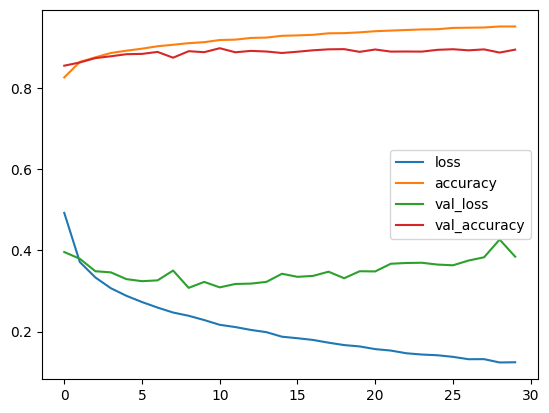

In [6]:
pd.DataFrame(history.history).plot()
plt.show()

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_test_pred = np.argmax(model.predict(X_test_images), axis=1)
print("F1 Score: ", {f1_score(y_test_labels, y_test_pred, average="macro")})

313/313 [==============================] - 1s 2ms/step
F1 Score:  {0.8909850139996202}


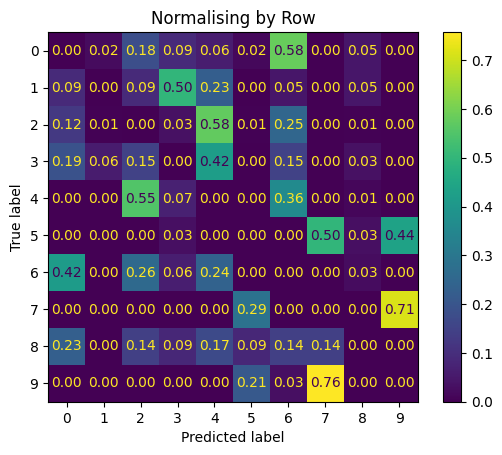

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

sample_weight = (y_test_labels != y_test_pred)
ConfusionMatrixDisplay.from_predictions(
    y_test_labels, 
    y_test_pred, 
    normalize="true", 
    values_format=".2f",
    sample_weight=sample_weight
)
plt.title("Normalising by Row")
plt.show()

## Verifying Another Model

In [9]:
dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

dropout_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [10]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("new_model.h5", save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
history = dropout_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid),
    epochs=100, callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/100
1625/1625 [==============================] - 14s 8ms/step - loss: 0.5702 - accuracy: 0.7946 - val_loss: 0.4340 - val_accuracy: 0.8464
Epoch 2/100
  15/1625 [..............................] - ETA: 11s - loss: 0.4276 - accuracy: 0.8458

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1625/1625 [==============================] - 12s 7ms/step - loss: 0.4278 - accuracy: 0.8456 - val_loss: 0.3820 - val_accuracy: 0.8572
Epoch 3/100
1625/1625 [==============================] - 13s 8ms/step - loss: 0.3953 - accuracy: 0.8561 - val_loss: 0.3683 - val_accuracy: 0.8649
Epoch 4/100
1625/1625 [==============================] - 12s 8ms/step - loss: 0.3716 - accuracy: 0.8656 - val_loss: 0.3528 - val_accuracy: 0.8723
Epoch 5/100
1625/1625 [==============================] - 13s 8ms/step - loss: 0.3561 - accuracy: 0.8706 - val_loss: 0.3506 - val_accuracy: 0.8748
Epoch 6/100
1625/1625 [==============================] - 13s 8ms/step - loss: 0.3388 - accuracy: 0.8765 - val_loss: 0.3358 - val_accuracy: 0.8815
Epoch 7/100
1625/1625 [==============================] - 12s 8ms/step - loss: 0.3287 - accuracy: 0.8808 - val_loss: 0.3188 - val_accuracy: 0.8826
Epoch 8/100
1625/1625 [==============================] - 12s 8ms/step - loss: 0.3203 - accuracy: 0.8829 - val_loss: 0.3254 - val_accurac

In [12]:
y_pred_dropout = np.argmax(dropout_model.predict(X_test_images), axis=1)
print("F1 Score: ", f1_score(y_test_labels, y_pred_dropout, average="macro"))

313/313 [==============================] - 1s 3ms/step
F1 Score:  0.8763082002873676


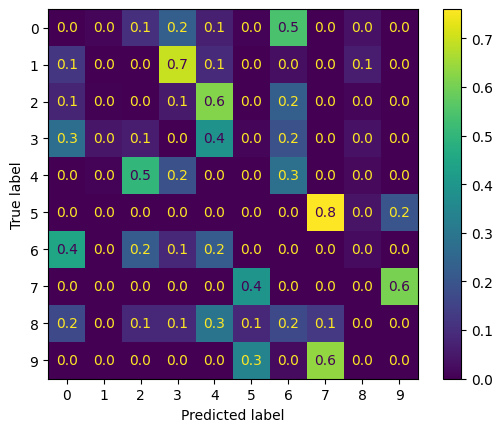

In [13]:
sample_weights = (y_test_labels != y_pred_dropout)
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_dropout, 
                                        sample_weight=sample_weights, normalize="true", values_format=".1f")
plt.show()

In [14]:
dropout_model.save("new_model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Implementing Custom Callbacks**

In [15]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") >= 0.85:
            print("\nAccuracy Achieved, Cancelling Training ....")
            self.model.stop_training = True
            
my_cb = MyCallback()

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, callbacks=[my_cb])

Epoch 1/50
1620/1625 [============================>.] - ETA: 0s - loss: 0.1189 - accuracy: 0.9557
Accuracy Achieved, Cancelling Training ....
1625/1625 [==============================] - 10s 6ms/step - loss: 0.1190 - accuracy: 0.9556 - val_loss: 0.3775 - val_accuracy: 0.8967


## Implementing CNN's with Pooling

In [17]:
cnn_model = tf.keras.models.Sequential([    
    # Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    
    # Pooling Layer
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

**Compiling the Model**

In [18]:
cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test_images = X_test_images.reshape(X_test_images.shape[0], 28, 28, 1)

In [20]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [21]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cnn_model", save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

In [22]:
history = cnn_model.fit(
    X_train, y_train, 
    validation_data=(X_valid, y_valid),
    epochs=30, callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/30
1625/1625 [==============================] - 147s 89ms/step - loss: 0.4207 - accuracy: 0.8441 - val_loss: 0.3125 - val_accuracy: 0.8796
Epoch 2/30
1625/1625 [==============================] - 146s 90ms/step - loss: 0.2688 - accuracy: 0.9017 - val_loss: 0.2422 - val_accuracy: 0.9112
Epoch 3/30
1625/1625 [==============================] - 145s 89ms/step - loss: 0.2196 - accuracy: 0.9181 - val_loss: 0.2220 - val_accuracy: 0.9202
Epoch 4/30
1625/1625 [==============================] - 145s 89ms/step - loss: 0.1861 - accuracy: 0.9304 - val_loss: 0.2206 - val_accuracy: 0.9194
Epoch 5/30
1625/1625 [==============================] - 142s 88ms/step - loss: 0.1574 - accuracy: 0.9417 - val_loss: 0.2207 - val_accuracy: 0.9219
Epoch 6/30
1625/1625 [==============================] - 142s 87ms/step - loss: 0.1341 - accuracy: 0.9496 - val_loss: 0.2345 - val_accuracy: 0.9206
Epoch 7/30
1625/1625 [==============================] - 143s 88ms/step - loss: 0.1111 - accuracy: 0.9581 - val_loss: 0

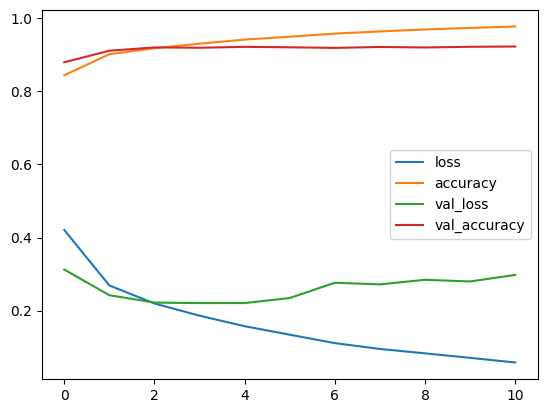

In [23]:
pd.DataFrame(history.history).plot()
plt.show()

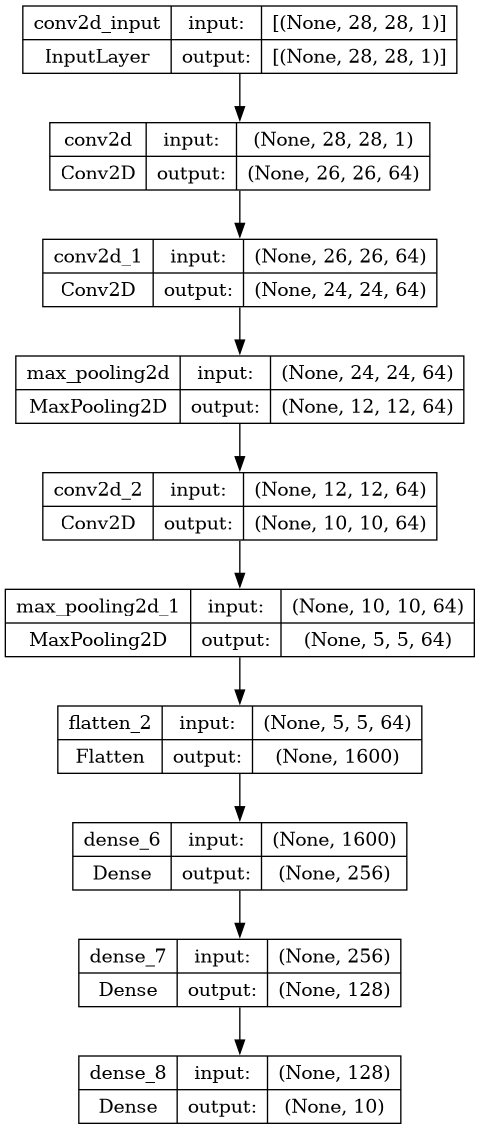

In [24]:
tf.keras.utils.plot_model(cnn_model, show_layer_names=True, show_shapes=True)

In [25]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)             